<a href="https://colab.research.google.com/github/bikash119/learn_tensorflow/blob/main/learn_tf_003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network Classification with Tensorflow

### Typical architecture of a Classification Neural Network
* An Input Layer
* Some Hidden Layers
* An Output Layer

The following are some standard values we will often see in our classification models

|Hyperparameter|Binary Classification|Multiclass Classification
---|---|---
Input Layer shape|Same as the number of features| Same as binary classification
Hidden layer(s)|Problem specific, min=1, max=unlimited| Same as binary classification
Neurons per hidden layer|Problem specific, generally 10 to 100|Same as binary classification
Output Layer shape|1 (one class or the other)|1 per class(e.g. 3 for food, person or dog photo)
Hidden activation|Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning)|Same as binary classification
Output activation| [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function)|[Softmax](https://en.wikipedia.org/wiki/Softmax_function)
Loss function|[Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression)([`tf.keras.losses.BinaryCrossEntropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TF)|[Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression)([`tf.keras.losses.CategoricalCrossEntropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TF)
Optimizer|[SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)| Same as binary classification

### Step 1 : Try building a classification model on toy dataset
> 🔑 Note: It's a common practice to get us and the model we build, works on a toy dataset before moving to actual problem. Treat this as a rehersal experiment before the actual one.

Let's make use of Scikit-Learn's `make_circles()` function to create a non-linear dataset

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

# Create circles
X,y = make_circles(n_samples
                   ,noise=0.03
                   ,random_state=42)

In [ ]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

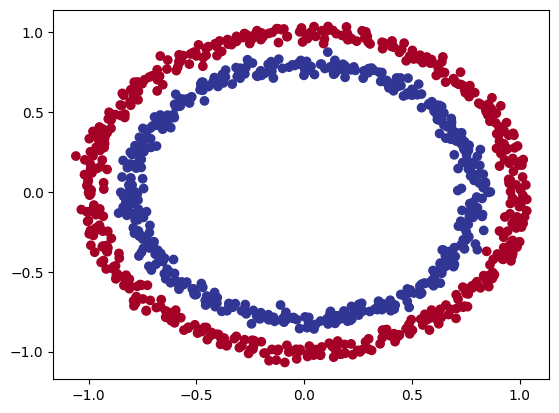

In [ ]:
#visualize the data with plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

In [ ]:
# Shape of data
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

Steps to create the model
1. **Create a model** - piece together the layers of neural network
2. **Compile a model** - define how a model's performance should be measured and improved.
3. **Fitting a model** - letting the model find patterns in data

In [ ]:
## Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# set seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy()
              ,optimizer=tf.keras.optimizers.SGD()
              ,metrics=["accuracy"]
              )

# fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 3.9190 - accuracy: 0.4800
Epoch 2/5
32/32 [==============================] - 0s 930us/step - loss: 1.4059 - accuracy: 0.5120
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7059 - accuracy: 0.5060
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6976 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.4920


In [ ]:
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Lets try adding one more layer and training it longer

In [ ]:
# set seed
tf.random.set_seed(42)

# Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ,tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy()
              ,optimizer=tf.keras.optimizers.SGD()
              ,metrics=["accuracy"])

# fit the model
model_2.fit(X,y,epochs=300,verbose=0)

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 947us/step - loss: 0.6933 - accuracy: 0.5000


[0.6932752132415771, 0.5]

## Improving the model

#### Approach 1
1. Increase the number of layers
2. Increase the number of hidden units
3. Use Adam as optimizer.
4. Train for more epochs

In [ ]:
# set seed
tf.random.set_seed(42)

# Build the model
model_3 = tf.keras.Sequential([
     tf.keras.layers.Dense(100)
    ,tf.keras.layers.Dense(10)
    ,tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy()
                ,optimizer=tf.keras.optimizers.Adam()
                ,metrics=['accuracy'])

# Fit the model
model_3.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 876us/step - loss: 0.6962 - accuracy: 0.5050


[0.6962302327156067, 0.5049999952316284]

> 🔑Note - Whenever the model is performing strangely or there is something going on with data we are not able to explain, only thing can save us is to **visualize**. **Visualize** the data, the model, the prediction.

Plotting a decision boundary can be one of the effective ways to visualize the data and the model predictions.



In [ ]:
import numpy as np
def plot_decision_boundary(model,X,y)-> None:
  """
    Plots the decision boundary created by a model prediction on X.
    This function has been adopted from following resources
    1. CS231n : https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min,y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  xx,yy = np.meshgrid( np.linspace(x_min,x_max,100)
                      ,np.linspace(y_min,y_max,100)
                      )

  # create X values
  x_in =np.c_[xx.ravel(),yy.ravel()]

  y_pred = model(x_in)

  # check if the model is multi-class
  if model.output_shape[-1] > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(np.max(y_pred,axis=1)).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

doing binary classification


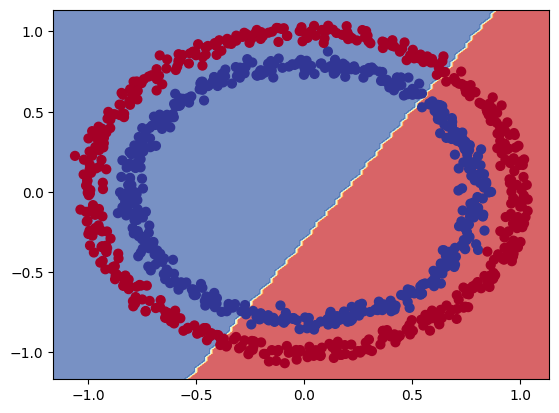

In [ ]:
plot_decision_boundary(model_3,X,y)

Ok, so the data cannot be represented on a straight line, but the model is predicting values only on a straing line. Let's execute a experiment if the model is able to do better on data which can be represented on a straight line.

In [ ]:
#set seed
tf.random.set_seed(42)

# Create regression data
X_regression = np.arange(0,1000,5)
y_regression = np.arange(100,1100,5)

# Split the data to train and test
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]

# This will not work as the model is compiled for binary classification.
# We need to build and compile the model for regression
# model_3.fit(tf.expand_dims(X_reg_train,axis=-1)
#             ,y_reg_train
#             ,epochs=5)

model_3 = tf.keras.Sequential([
     tf.keras.layers.Dense(100)
    ,tf.keras.layers.Dense(10)
    ,tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae
                ,optimizer=tf.keras.optimizers.Adam()
                ,metrics=['mae'])

history = model_3.fit(tf.expand_dims(X_reg_train,axis=-1)
            ,y_reg_train
            ,epochs=100
            ,verbose=0)


In [ ]:
model_3.evaluate(X_reg_test,y_reg_test)

2/2 [==============================] - 0s 5ms/step - loss: 58.9762 - mae: 58.9762


[58.976200103759766, 58.976200103759766]

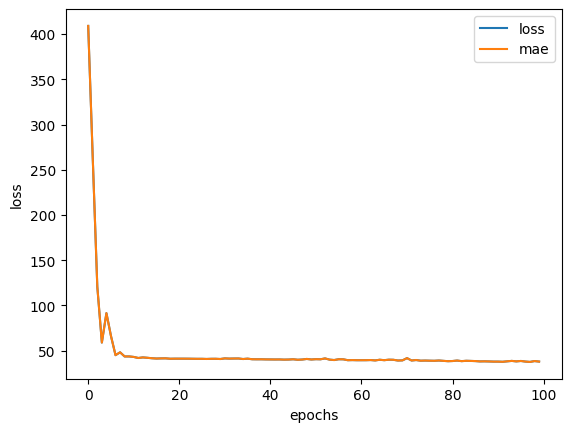

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend();

2/2 [==============================] - 0s 4ms/step


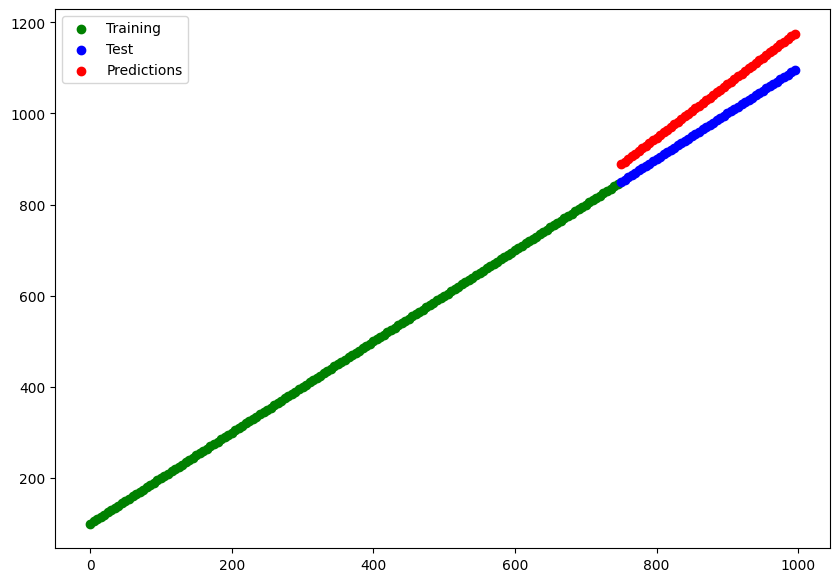

In [ ]:
# Plot the prediction
y_reg_preds= model_3.predict(X_reg_test)

# plot the model prediction against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='g',label='Training')
plt.scatter(X_reg_test,y_reg_test,c='b',label='Test')
plt.scatter(X_reg_test,y_reg_preds,c='r',label='Predictions')
plt.legend();

> 🔨 Before moving on to the next steps, we should have an intuition of what an activation function is and how it helps the model learn pattern in the training data. Hence , lets spend 10 min https://playground.tensorflow.org

The main addition to our earlier way of building models is from now on , we will add `activations` to our layers

🧗time

In [ ]:
# set seeds
tf.random.set_seed(42)

# Build the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
    ,tf.keras.layers.Dense(1)
])

# compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy()
                ,optimizer=tf.keras.optimizers.Adam(learning_rate=0.003)
                ,metrics=['accuracy'])

# fit the model
history_5 = model_5.fit(X,y,epochs=100,verbose=0)

doing binary classification


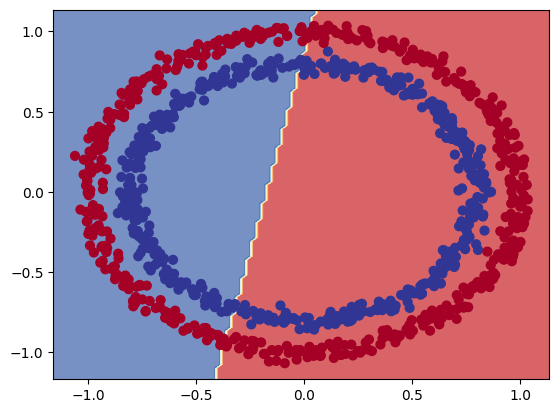

In [ ]:
plot_decision_boundary(model_5,X,y)

As our data is non-linear , lets add a non-linear activation to one of the model layers and give it a try

In [ ]:
# set seeds
tf.random.set_seed(42)

# build the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1
                          ,activation=tf.keras.activations.relu)
    ,tf.keras.layers.Dense(1)
])

# compile the model

model_6.compile(loss=tf.keras.losses.binary_crossentropy
                ,optimizer=tf.keras.optimizers.Adam(learning_rate=0.003)
                ,metrics=['accuracy'])

# fit the model

history_6 = model_6.fit(X,y,epochs=300,verbose=0)

In [ ]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 943us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


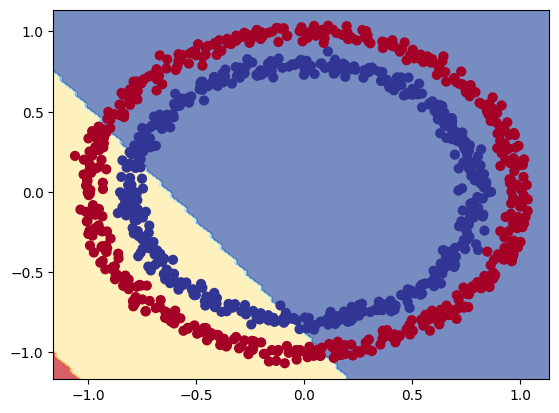

In [ ]:
plot_decision_boundary(model_6,X,y)

🙍 No change

I played with [Tensorflow Playground](https://playground.tensorflow.org). [This](https://playground.tensorflow.org/#activation=relu&batchSize=12&dataset=circle&regDataset=reg-plane&learningRate=0.003&regularizationRate=0&noise=10&networkShape=4,3&seed=0.96420&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) network architecture with 200 epochs was seemed to make the model learn the patterns of non-linear data.
Let's replicate the architecture in TF

In [ ]:
# set seed
tf.random.set_seed(42)

# build the model

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4,activation=tf.keras.activations.relu)
    ,tf.keras.layers.Dense(units=3,activation=tf.keras.activations.relu)
    ,tf.keras.layers.Dense(1)
])

# compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy
                ,optimizer=tf.keras.optimizers.Adam(learning_rate=0.003)
                ,metrics=['accuracy']
                )

# fit the model
history_7 = model_7.fit(X,y,epochs=200,verbose=0)


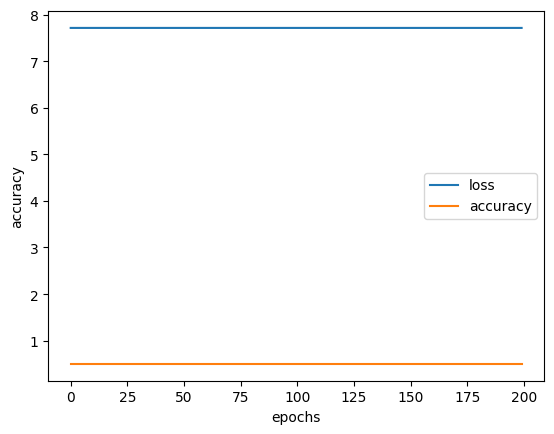

In [ ]:
pd.DataFrame(history_7.history).plot()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend();

In [ ]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


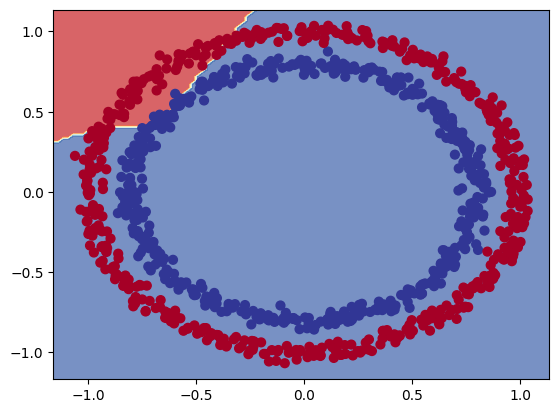

In [ ]:
plot_decision_boundary(model_7,X,y)

Let's try with addition activation to the output layer and check if we can make our model better.
> 🔑Note : For Binary Classification the output layer activation is usually σ ( Sigmoid Activation Function)

In [ ]:
# set seed
tf.random.set_seed(42)

# Build the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4,activation=tf.keras.activations.relu)
    ,tf.keras.layers.Dense(units=4,activation=tf.keras.activations.relu)
    ,tf.keras.layers.Dense(units=1,activation=tf.keras.activations.sigmoid)
])

# compile the model

model_8.compile(loss=tf.keras.losses.binary_crossentropy
                ,optimizer=tf.keras.optimizers.Adam(learning_rate=0.003)
                ,metrics=["accuracy"])

# fit the model
history_8 = model_8.fit(X,y,epochs=200,verbose=0)

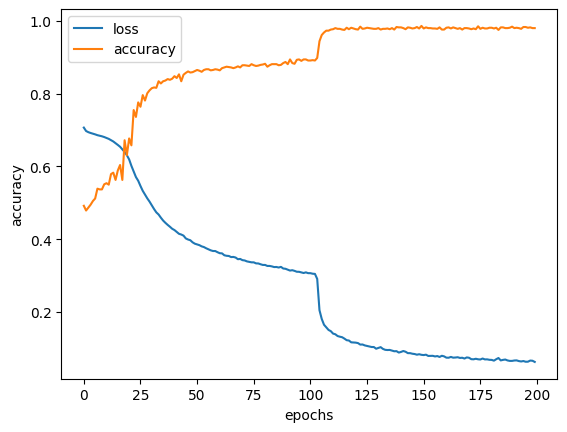

In [ ]:
pd.DataFrame(history_8.history).plot()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend();

In [ ]:
model_8.evaluate(X,y)

32/32 [==============================] - 0s 905us/step - loss: 0.0622 - accuracy: 0.9820


[0.062174487859010696, 0.9819999933242798]

doing binary classification


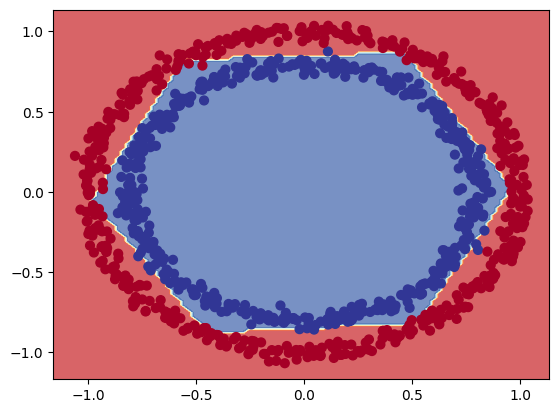

In [ ]:
plot_decision_boundary(model_8,X,y)

We have been training and evaluating the model on same set of data. Lets split the data into train and test. Train the model on train data and evaluate the model on test data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y
                                                 ,test_size=0.2
                                                 ,random_state=42)

len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [ ]:
#set seeds
tf.random.set_seed(42)

# build the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4,activation=tf.keras.activations.relu)
    ,tf.keras.layers.Dense(units=4,activation=tf.keras.activations.relu)
    ,tf.keras.layers.Dense(units=1,activation=tf.keras.activations.sigmoid)
])

# compile the model
model_9.compile(loss=tf.keras.losses.binary_crossentropy
                ,optimizer=tf.keras.optimizers.Adam(learning_rate=0.003)
                ,metrics=["accuracy"])

# fit the model
history_9 = model_9.fit(X_train,y_train,epochs=200,verbose=0)

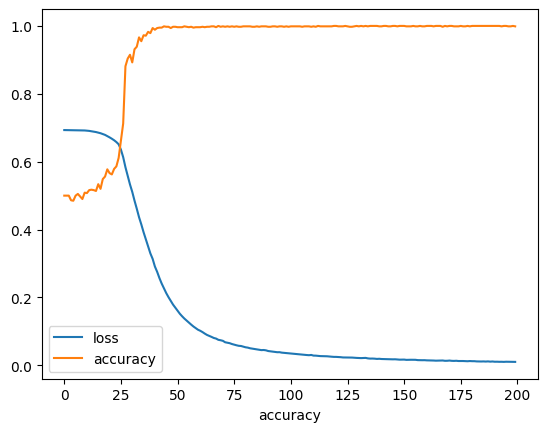

In [ ]:
pd.DataFrame(history_9.history).plot()
plt.xlabel('epochs')
plt.xlabel('accuracy')
plt.legend();

In [ ]:
loss,accuracy = model_9.evaluate(X_test,y_test)
print(f" Model loss on test data: {loss:.4f}")
print(f" Accuracy loss on test data: {100*accuracy:.4f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9900
 Model loss on test data: 0.0419
 Accuracy loss on test data: 99.0000%


doing binary classification
doing binary classification


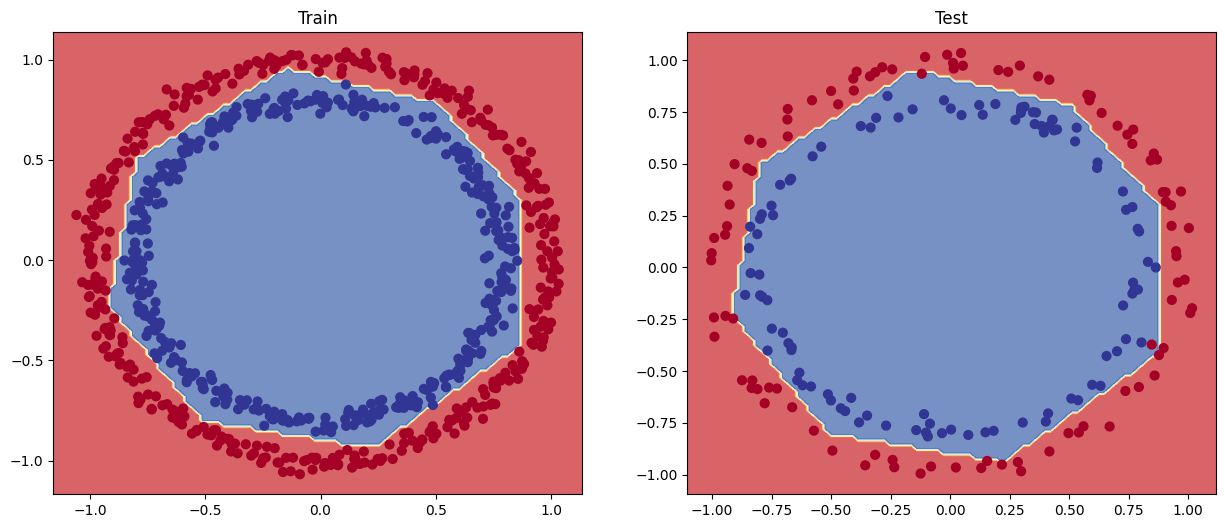

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9,X_test,y_test)

## Learn the Learning Rate

In [ ]:
# Set seed
tf.random.set_seed(42)

# create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu)
    ,tf.keras.layers.Dense(4,activation=tf.keras.activations.relu)
    ,tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

# compile the model
model_10.compile(loss=tf.keras.losses.binary_crossentropy
                ,optimizer=tf.keras.optimizers.Adam()
                ,metrics=['accuracy'])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))

# Train the model
history_10=model_10.fit(X_train,y_train,epochs=100
            ,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7116 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7111 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7105 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7099 - accuracy: 0.4963 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7092 - accuracy: 0.4875 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7085 - accuracy: 0.4913 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7077 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7069 - accuracy: 0.4938 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

<Axes: xlabel='epochs'>

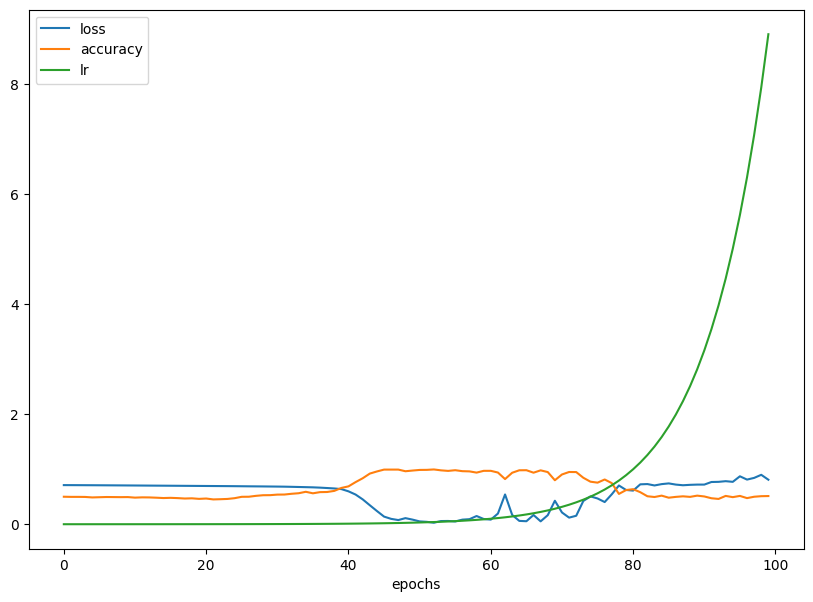

In [ ]:
pd.DataFrame(history_10.history).plot(figsize=(10,7),xlabel="epochs")

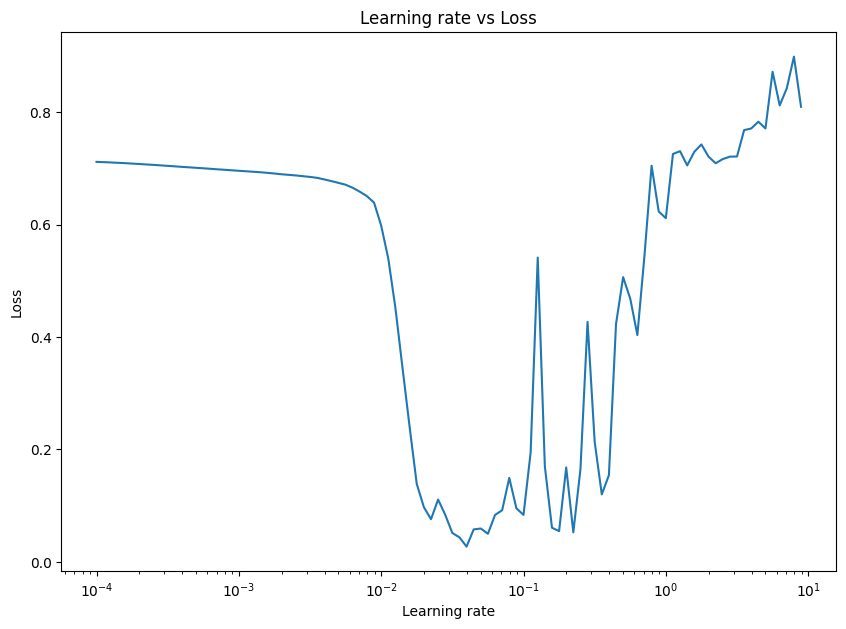

In [ ]:
# Plot the learning rate curve vs loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_10.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss");

## Confusion Matrix

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make Predictions
y_preds_10 = model_10.predict(X_test)

# create confusion matrix
confusion_matrix(y_test,y_preds_10)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
y_preds_10[:10]

array([[0.819649],
       [0.819649],
       [0.819649],
       [0.819649],
       [0.819649],
       [0.819649],
       [0.819649],
       [0.819649],
       [0.819649],
       [0.819649]], dtype=float32)

In [ ]:
tf.round(y_preds_10[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test,tf.round(y_preds_10))

array([[  0, 100],
       [  0, 100]])

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0759 - accuracy: 0.9800


[0.07587768137454987, 0.9800000190734863]

## Working with larger examples ( multiclass classification ).

We will use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset available in TensorFlow dataset `tf.keras.dataset`

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

print(f"{tf.__version__}")

2.12.0


In [ ]:
(train_data, train_label), (test_data,test_label) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Plot a train data and display its corresponding label

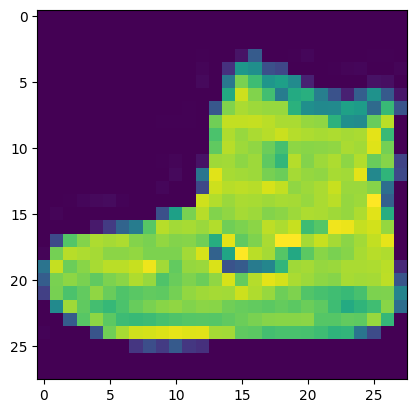

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
train_label[0]

9

Description of image labels can be found on the [dataset's github page](https://github.com/zalandoresearch/fashion-mnist#labels)

In [ ]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
class_names[train_label[0]]

'Ankle boot'

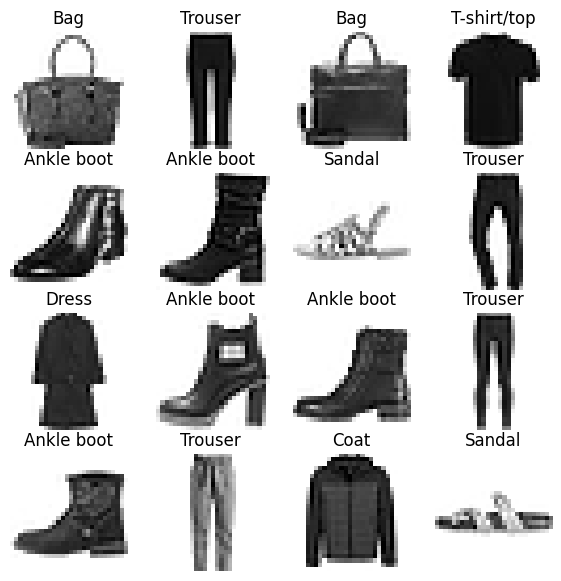

In [ ]:
# Plot multiple random images from train_data
import random
plt.figure(figsize=(7,7))

for i in range(16):
  ax=plt.subplot(4,4,i+1)
  rand_idx = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_idx],cmap=plt.cm.binary)
  plt.title(class_names[train_label[rand_idx]])
  plt.axis(False)

To deal with multiclass classification problem, we will have to make a few changes to our network architecture

* The **input shape** will have to deal with 28 x 28 tensors.
  * We will have to squash the input into a tensor (vector) of shape `(784)`
* The **output shape** will have to be 10 because we need out model to predict for 10 different classes.
  * We will have to change the output activation from `sigmoid` to `softmax`. The `softmax` activation function outputs a series of values between 0 & 1. Then index with the highest value is predicted by the model to be the most likely class

* We need to change our loss function from binary classification loss function to multiclass classification loss function.
  * More specifically since our labels are integers , we will use `tf.keras.losses.SparseCategoricalCrossEntropy()`. If the labels were one-hot coded we need to use `tf.keras.losses.CategoricalCrossEntropy`
* We will also use the `validation_data` parameter when calling the `fit()` function. This will give us idea how the model performs on the test set during training.



In [68]:
# set seeds
tf.random.set_seed(42)

# Build the model

model_11 = tf.keras.Sequential([
    #flatten the image : squash the input into a tensor (vector) of shape (784)
    tf.keras.layers.Flatten(input_shape=(28,28))
    ,tf.keras.layers.Dense(4,activation=tf.keras.activations.relu)
    ,tf.keras.layers.Dense(4,activation=tf.keras.activations.relu)
    ,tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy()
                 ,optimizer = tf.keras.optimizers.Adam(lr=0.003)
                 ,metrics=["accuracy"]
                 )


# train the model
history_11 = model_11.fit(train_data,train_label,epochs=10,
                          validation_data=(test_data,test_label))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3029 - accuracy: 0.1057 - val_loss: 2.2846 - val_accuracy: 0.1081
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2845 - accuracy: 0.1079 - val_loss: 2.2701 - val_accuracy: 0.1185
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2468 - accuracy: 0.1282 - val_loss: 2.1743 - val_accuracy: 0.1591
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.8085 - accuracy: 0.2396 - val_loss: 1.6946 - val_accuracy: 0.2754
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6646 - accuracy: 0.2849 - val_loss: 1.6398 - val_accuracy: 0.2872
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6272 - accuracy: 0.2881 - val_loss: 1.6200 - val_accuracy: 0.2906
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6108 - accuracy: 0.2885 - val_loss: 1.6018 - val_accuracy:

<Axes: xlabel='epochs'>

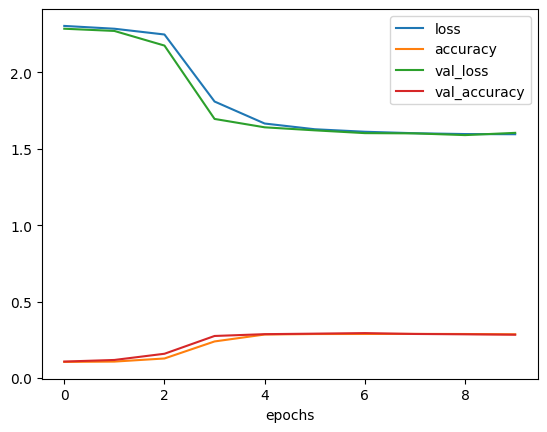

In [70]:
pd.DataFrame(history_11.history).plot(xlabel='epochs')

In [71]:
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


```
Neural networks prefer the input value between 0 & 1. In other words, data need to be normalized
```
Lets us check the train_data



In [72]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [73]:
train_data[0].min(),train_data[0].max()

(0, 255)

So the data we are passing is `not normalized`. Let's normalize the train_data and test_data

In [74]:
train_data = train_data/255
test_data = test_data/255

train_data[0].max(),train_data[0].min(),test_data[0].max(),test_data[0].min(),

(1.0, 0.0, 1.0, 0.0)

Let retry training the model with normalized training and test data

In [80]:
# set seed
tf.random.set_seed(42)

# build the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28))
    ,tf.keras.layers.Dense(4,activation=tf.keras.activations.relu)
    ,tf.keras.layers.Dense(4,activation=tf.keras.activations.relu)
    ,tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy()
                 ,optimizer=tf.keras.optimizers.Adam()
                 ,metrics=["accuracy"])

# train the model
history_12 = model_12.fit(train_data,train_label, epochs=20
             ,validation_data=(test_data,test_label))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9691 - accuracy: 0.6564 - val_loss: 0.6978 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6502 - accuracy: 0.7785 - val_loss: 0.6565 - val_accuracy: 0.7736
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6181 - accuracy: 0.7879 - val_loss: 0.6338 - val_accuracy: 0.7755
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5990 - accuracy: 0.7945 - val_loss: 0.6158 - val_accuracy: 0.7872
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5855 - accuracy: 0.7975 - val_loss: 0.6181 - val_accuracy: 0.7854
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5719 - accuracy: 0.8019 - val_loss: 0.6258 - val_accuracy: 0.7806
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5599 - accuracy: 0.8084 - val_loss: 0.6065 - val_accuracy:

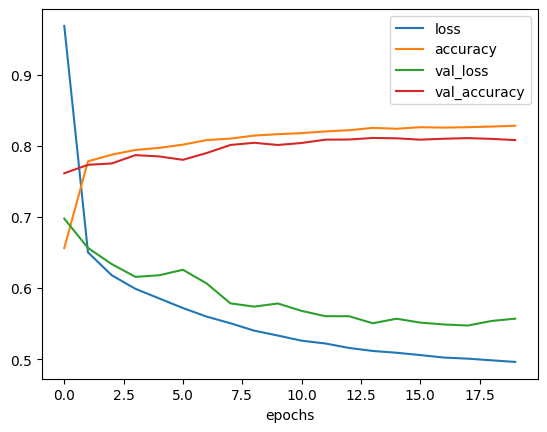

In [81]:
pd.DataFrame(history_12.history).plot(xlabel="epochs");

Let us find the ideal learning rate using `LearningRateScheduler`

In [82]:
# set seeds
tf.random.set_seed(42)

# build the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28))
    ,tf.keras.layers.Dense(4,activation="relu") # Passing activation function as string also works
    ,tf.keras.layers.Dense(4,activation="relu")
    ,tf.keras.layers.Dense(10,activation="softmax")
])

# compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy()
                 ,optimizer=tf.keras.optimizers.Adam()
                 ,metrics=["accuracy"]
                 )

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(schedule=lambda epoch: 1e-4 * 10**(epoch/20))
# fit the model

history_13 = model_13.fit(train_data,train_label,epochs=40
                          ,validation_data=(test_data,test_label)
                          ,callbacks=[lr_scheduler]
                          )

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9483 - accuracy: 0.2547 - val_loss: 1.6861 - val_accuracy: 0.3975 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5436 - accuracy: 0.4110 - val_loss: 1.4241 - val_accuracy: 0.4618 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3088 - accuracy: 0.5149 - val_loss: 1.2196 - val_accuracy: 0.5272 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1347 - accuracy: 0.5583 - val_loss: 1.0678 - val_accuracy: 0.6011 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0004 - accuracy: 0.6170 - val_loss: 0.9553 - val_accuracy: 0.6353 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8853 - accuracy: 0.6797 - val_loss: 0.8208 - val_accuracy: 0.6967 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [============